In [1]:
%pylab inline
from astropy.io import fits
import aplpy
from pywavan import fbm2d, powspec, fan_trans, subfits
from scipy.optimize import curve_fit

Populating the interactive namespace from numpy and matplotlib


***
# Verification des données enregistré

In [2]:
im_g = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/gau.npy")
im_ng = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/coh.npy")

Text(0.5, 1.0, 'Coherent')

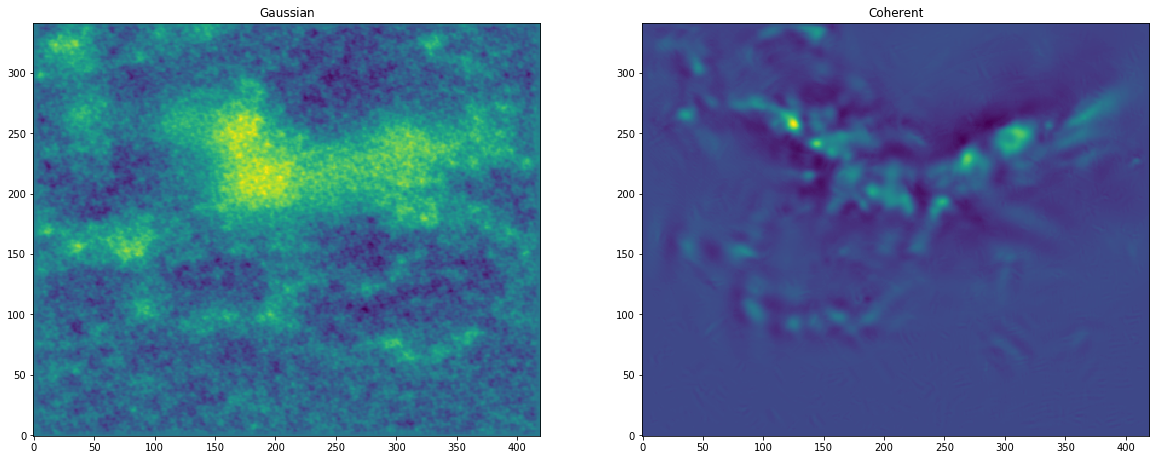

In [3]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_g[23].real,origin="lower")
title('Gaussian')

subplot(1,2,2)
imshow(im_ng[23].real,origin="lower")
title('Coherent')

***
4 image de la partie cohérente à différente partie du cube de donnée

In [4]:
im_ng.shape

(34, 342, 420)

Text(0.5, 1.0, 'canal 30')

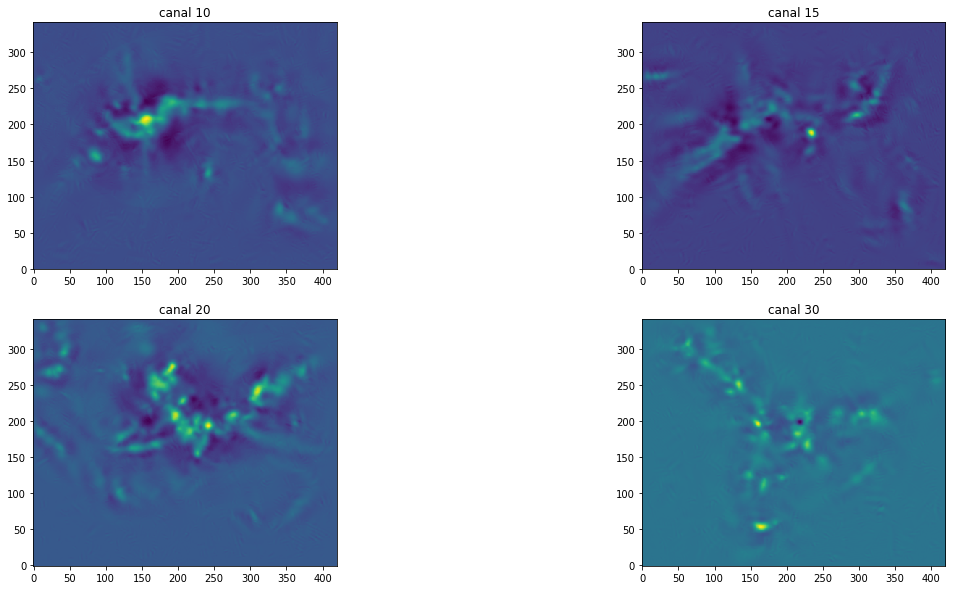

In [5]:
figure(figsize=(20,10))

subplot(2,2,1)
imshow(im_ng[10].real,origin="lower")
title('canal 10')

subplot(2,2,2)
imshow(im_ng[15].real,origin="lower")
title('canal 15')

subplot(2,2,3)
imshow(im_ng[20].real,origin="lower")
title('canal 20')

subplot(2,2,4)
imshow(im_ng[30].real,origin="lower")
title('canal 30')

***
# Transformation des données en fichier fits

In [6]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header

In [7]:
fits.writeto("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng.fits",im_ng.real, header) 

In [8]:
fits.writeto("/user/workdir/soldanof/data/G353_7_12_iso_cnts/gau.fits",im_g.real, header) 

***
# Traitement des fichier créé

Trace d'une image

INFO: Auto-setting vmin to -9.835e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.079e-01 [aplpy.core]


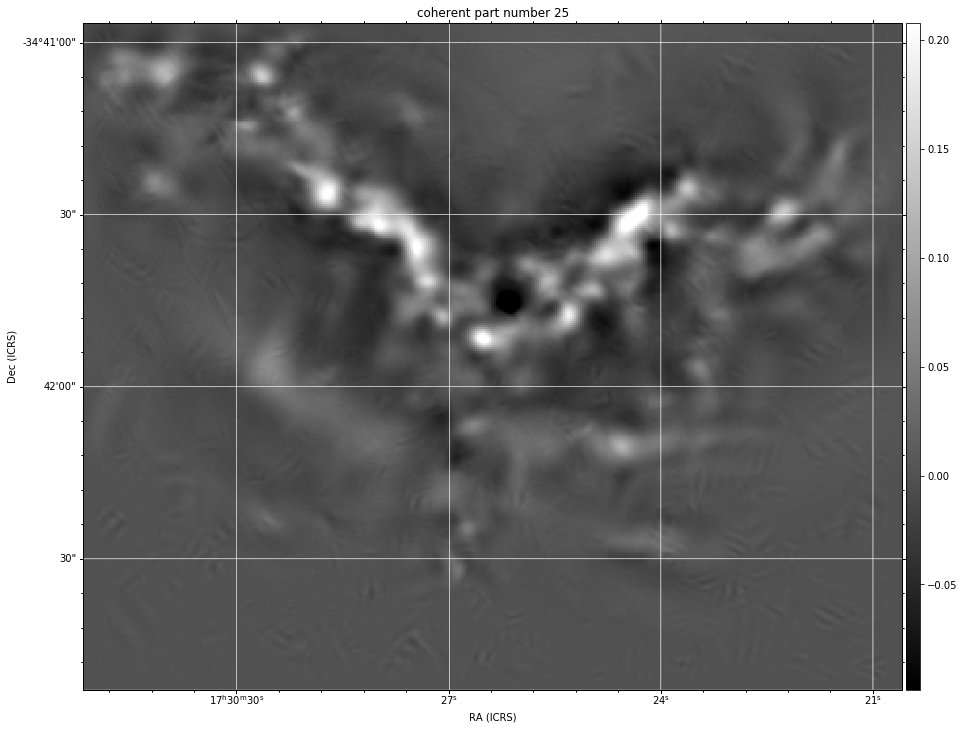

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
nbr = 25
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("coherent part number {}".format(nbr))

INFO: Auto-setting vmin to -5.139e-02 [aplpy.core]
INFO: Auto-setting vmax to  6.820e-02 [aplpy.core]


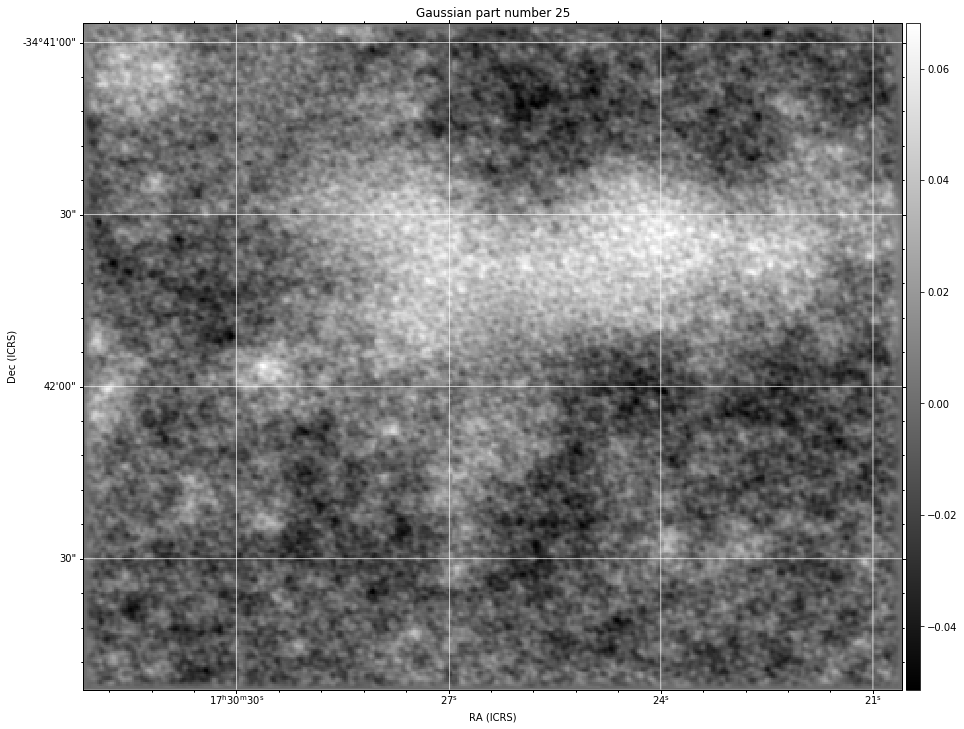

In [10]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/gau.fits",figure=fig_all,slices=[nbr])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.add_grid()
fig.set_title("Gaussian part number {}".format(nbr))

***
Trace Freq en fonction de Ra pour la partie gaussienne et la partie cohérente

INFO: Auto-setting vmin to -9.180e-02 [aplpy.core]
INFO: Auto-setting vmax to  2.679e-01 [aplpy.core]


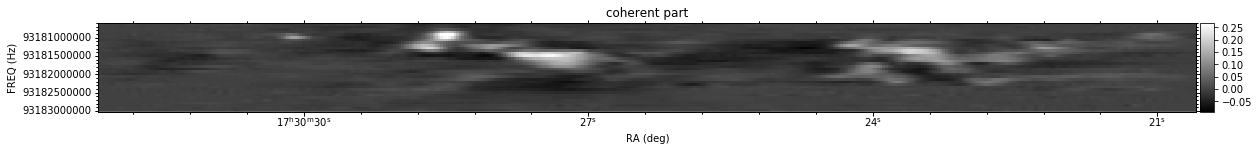

In [7]:
fig_all = plt.figure(1, figsize=(20,20))
fig = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng.fits",figure=fig_all,dimensions=[0,2],slices=[250])
fig.show_colorscale(cmap='gray')
fig.add_colorbar()
fig.set_title("coherent part")

***
# creation carte intégré (moment 0)

In [12]:
im_ng.shape

(34, 342, 420)

In [13]:
im_ng_int = np.sum(im_ng,axis=0)

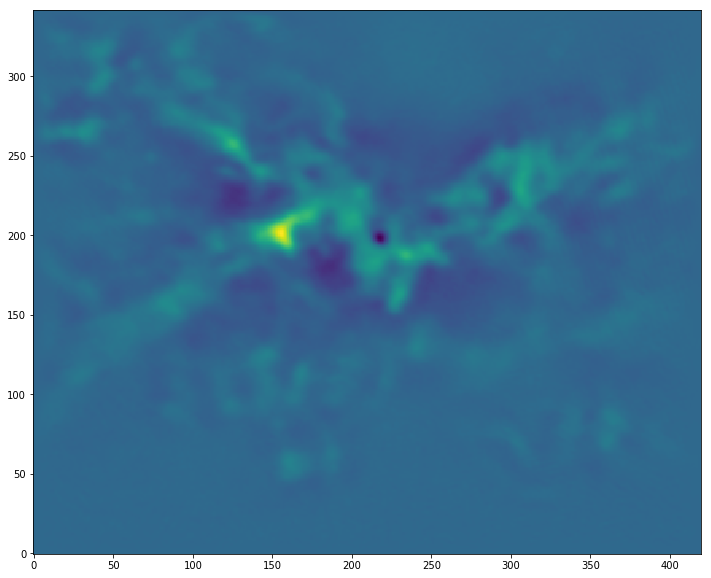

In [14]:
figure(figsize=(20,10))
imshow(im_ng_int.real,origin="lower")

In [15]:
im_tot_int = np.sum(cube,axis=0)

Text(0.5, 1.0, 'moment 0 original cube')

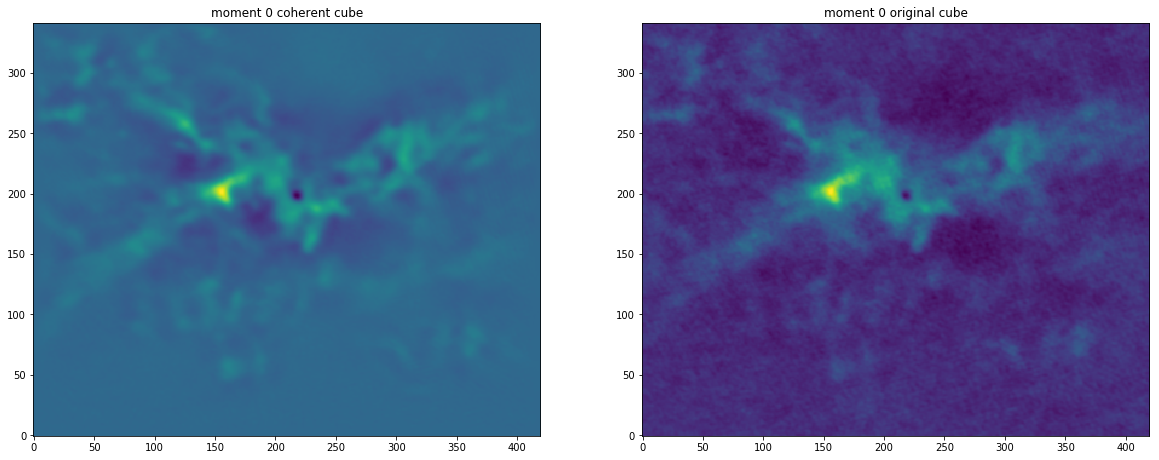

In [16]:
figure(figsize=(20,10))

subplot(1,2,1)
imshow(im_ng_int.real,origin="lower")
title('moment 0 coherent cube')

subplot(1,2,2)
imshow(im_tot_int.real,origin="lower")
title('moment 0 original cube') 

In [17]:
del header['NAXIS3']
del header['PC3_1']
del header['PC3_2']
del header['PC1_3']
del header['PC2_3']
del header['PC3_3']
del header['CTYPE3']
del header['CRVAL3']
del header['CDELT3']
del header['CRPIX3']
del header['CUNIT3']

In [18]:
header['NAXIS']=2
fits.writeto("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng_t.fits",im_ng_int.real, header,overwrite= True) 

INFO: Auto-setting vmin to -9.963e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.437e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.110e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.720e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.101e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.661e+00 [aplpy.core]


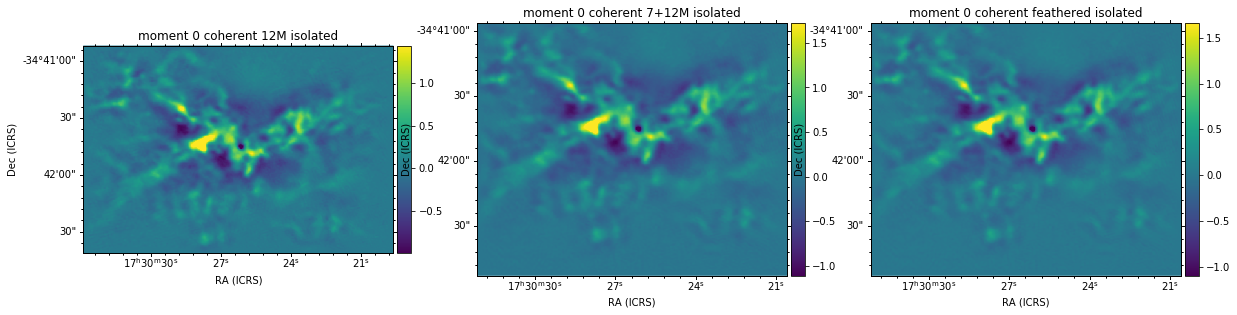

In [30]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,3,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 12M isolated")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,3,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 7+12M isolated")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,3,3))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent feathered isolated")

In [32]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-mom0.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-mom0.fits'
coord = np.array([267,299,686,640])
subfits(input1,output,coord)

Dimensions 420 342


In [33]:
input1 = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-0.07pix-mom1.fits'
output = '/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-0.07pix-mom1_cut.fits'
coord = np.array([267,299,686,640])
subfits(input1,output,coord)

Dimensions 420 342


INFO: Auto-setting vmin to -2.183e-01 [aplpy.core]
INFO: Auto-setting vmax to  7.845e-01 [aplpy.core]
INFO: Auto-setting vmin to -1.077e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.717e+00 [aplpy.core]


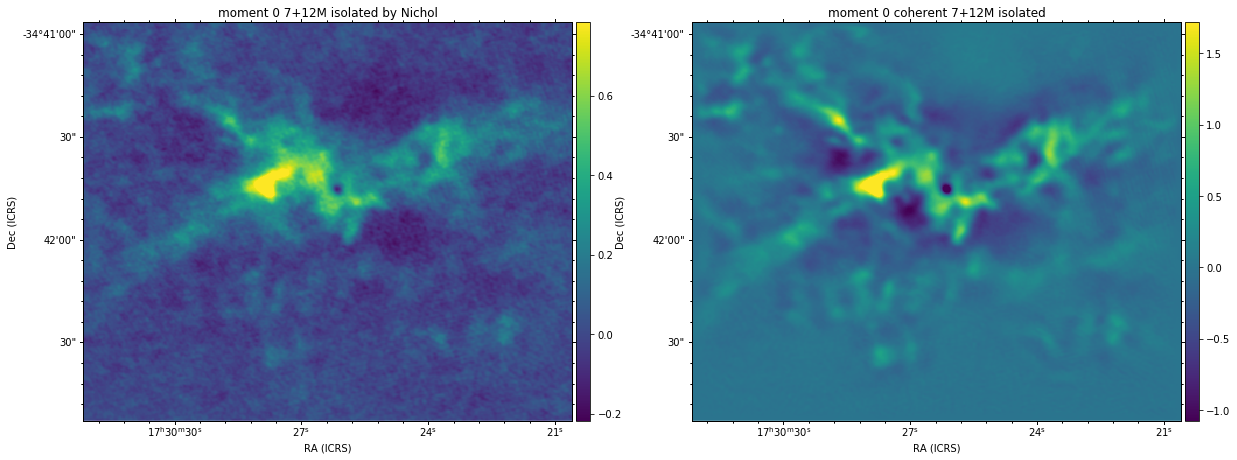

In [35]:
fig_vel = plt.figure(6,figsize=(20,10))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-mom0.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 7+12M isolated by Nichol")


f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/ng_t.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale()
f.add_colorbar()
f.set_title("moment 0 coherent 7+12M isolated")

***
# Moment 1

In [55]:

im_ng = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/coh.npy")
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop_cut.fits")
cube = HDU[0].data
header = HDU[0].header
N = header['NAXIS3']

for i in range(N):
    cube[i,:,:] -= np.mean(cube[i,:,:])
    moy = (cube[i,:,:]).mean()
    im_ad = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_ad[np.abs(im_ng_2d)>=np.abs(cube[i,5:50,5:100]).mean()] = moy
    im_ng[i,:,:] = im_ng[i,:,:] + im_ad
    
    im_rmv = np.zeros((im_ng.shape[1],im_ng.shape[2]))
    im_ng_2d = im_ng[i,:,:]
    im_rmv[(im_ng_2d)<=np.abs(cube[i,:,:]).mean()] = np.nan
    im_ng[i,:,:] = im_ng[i,:,:] + im_rmv
    #im_g[i,:,:] = im_g[i,:,:]+moy

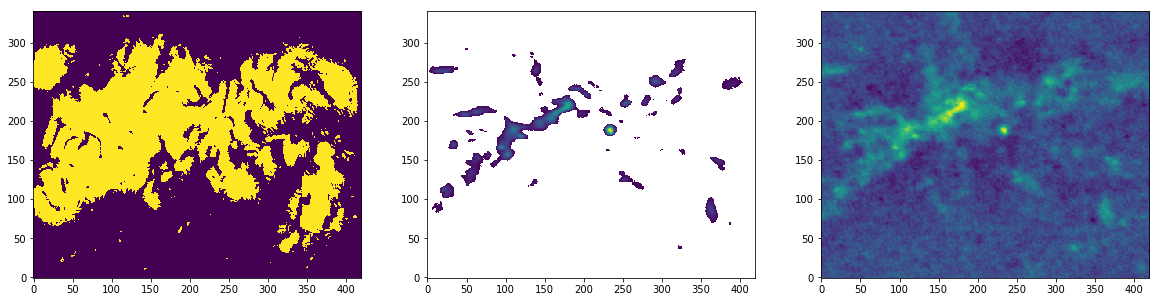

In [54]:
figure(figsize=(20,20))
subplot(131)
imshow(im_ad.real,origin="lower")

subplot(132)
imshow(im_ng[14].real,origin="lower")

subplot(133)
imshow(cube[14].real,origin="lower")

In [56]:
fits.writeto("/user/homedir/soldanof/ng_g353_7_12_iso_mean.fits",im_ng.real, header, overwrite = True) 

INFO: Auto-setting vmin to -2.064e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.343e+01 [aplpy.core]
INFO: Auto-setting vmin to -2.168e+01 [aplpy.core]
INFO: Auto-setting vmax to -1.333e+01 [aplpy.core]


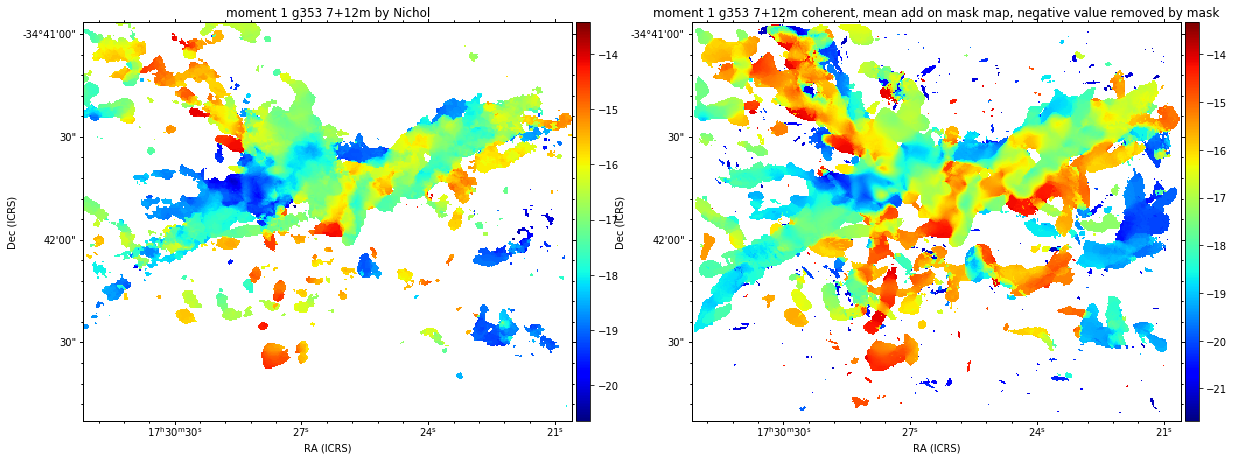

In [59]:
fig_vel = plt.figure(6,figsize=(20,20))
f = aplpy.FITSFigure("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-0.07pix-mom1_cut.fits",figure=fig_vel,subplot=(1,2,1))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 g353 7+12m by Nichol")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/moment1_g353_7_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,2,2))  
f.show_colorscale(cmap = 'jet')
f.add_colorbar()
f.set_title("moment 1 g353 7+12m coherent, mean add on mask map, negative value removed by mask")

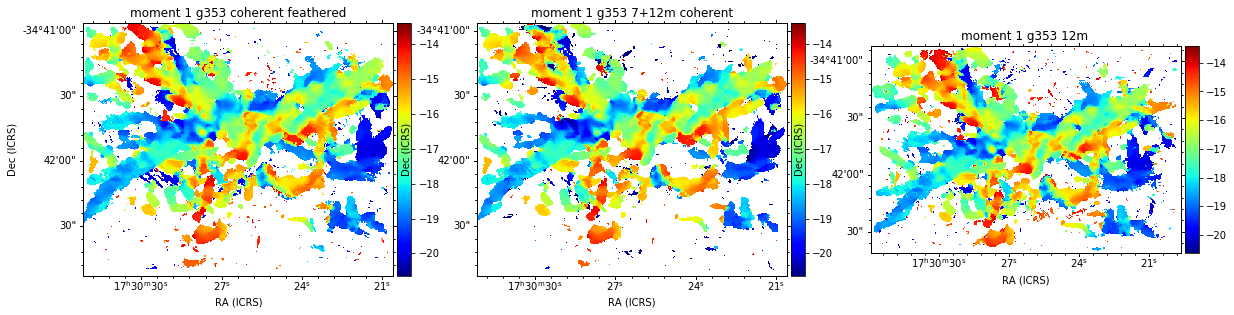

In [5]:
fig_vel = plt.figure(6,figsize=(20,20))
f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,1))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 coherent feathered")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_7_12_iso_cnts/moment1_g353_7_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,2))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 7+12m coherent")

f = aplpy.FITSFigure("/user/workdir/soldanof/data/G353_12_iso_cnts/moment1_g353_12_isolat_mean_M_pos.fits",figure=fig_vel,subplot=(1,3,3))  
f.show_colorscale(cmap = 'jet', vmin = -2.064e+01, vmax = -1.340e+01)
f.add_colorbar()
f.set_title("moment 1 g353 12m ")

Text(0.5, 1.0, 'G353 comparaison between 7+12m and feathered')

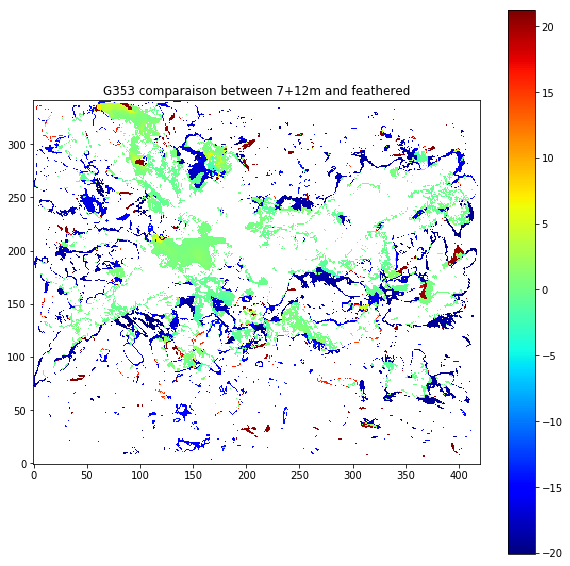

In [63]:
HDU = fits.open("/user/workdir/soldanof/data/G353f_iso_cnts/moment1_g353_f_isolat_mean_M_pos.fits")
cube_f = HDU[0].data
cube_f[np.isnan(cube_f)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/data/G353_7_12_iso_cnts/moment1_g353_7_12_isolat_mean_M_pos.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_f-cube_12
diff[np.abs(diff)<0.2]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("G353 comparaison between 7+12m and feathered")

Text(0.5, 1.0, 'G353 comparaison between 7+12m coherent and original by Nichol')

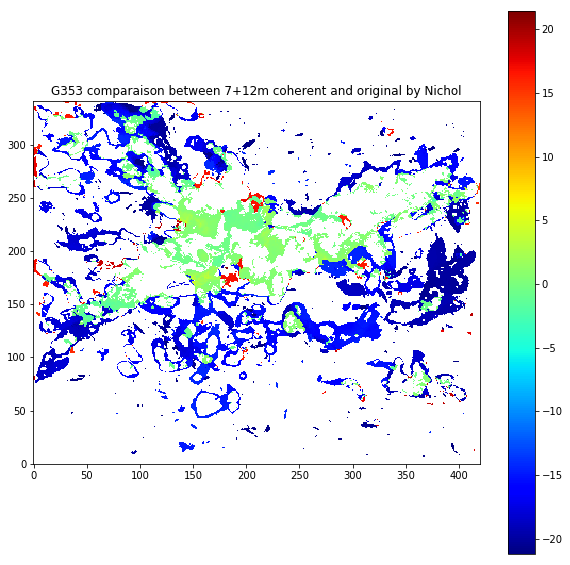

In [73]:
HDU = fits.open("/user/workdir/soldanof/ALMA/G353-MNGSEG/G353.41_B3_spw0_7M12M_n2hp_contsub-isolated-crop-0.07pix-mom1_cut.fits")
cube_f = HDU[0].data
cube_f[np.isnan(cube_f)]=0
header = HDU[0].header

HDU = fits.open("/user/workdir/soldanof/data/G353_7_12_iso_cnts/moment1_g353_7_12_isolat_mean_M_pos.fits")
cube_12 = HDU[0].data
cube_12[np.isnan(cube_12)]=0
header = HDU[0].header

diff = cube_12-cube_f
diff[np.abs(diff)<0.3]=np.nan
figure(figsize=(10,10))
imshow(diff,origin="lower",cmap='jet')
colorbar()
title("G353 comparaison between 7+12m coherent and original by Nichol")

***
# Traitement des donnée du spectre de puissance

In [74]:
t = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/s1at.npy")
g = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/s1ag.npy")
ng = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/s1ang.npy")
w_k = np.load("/user/workdir/soldanof/data/G353_7_12_iso_cnts/wave_k.npy")

Fonction de trace du spectre de puissance

In [75]:
def affiche(n) :
    plt.plot(w_k, t[n],label="total")
    plt.plot(w_k, g[n],"o",label="gaussian")
    plt.plot(w_k, ng[n],"x",label="non gaussian")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel('P(k)')
    plt.xlabel('k (arcmin$^{-1}$)')
    plt.title('canal number {}'.format(n))
    plt.legend()

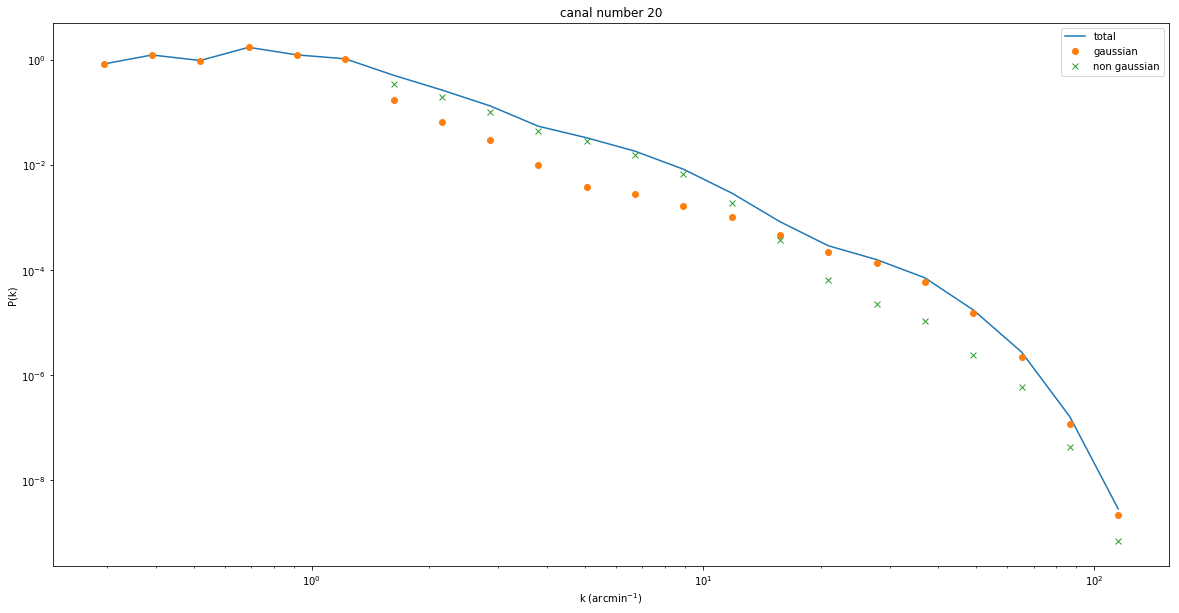

In [76]:
figure(figsize=(20,10))
affiche(20)

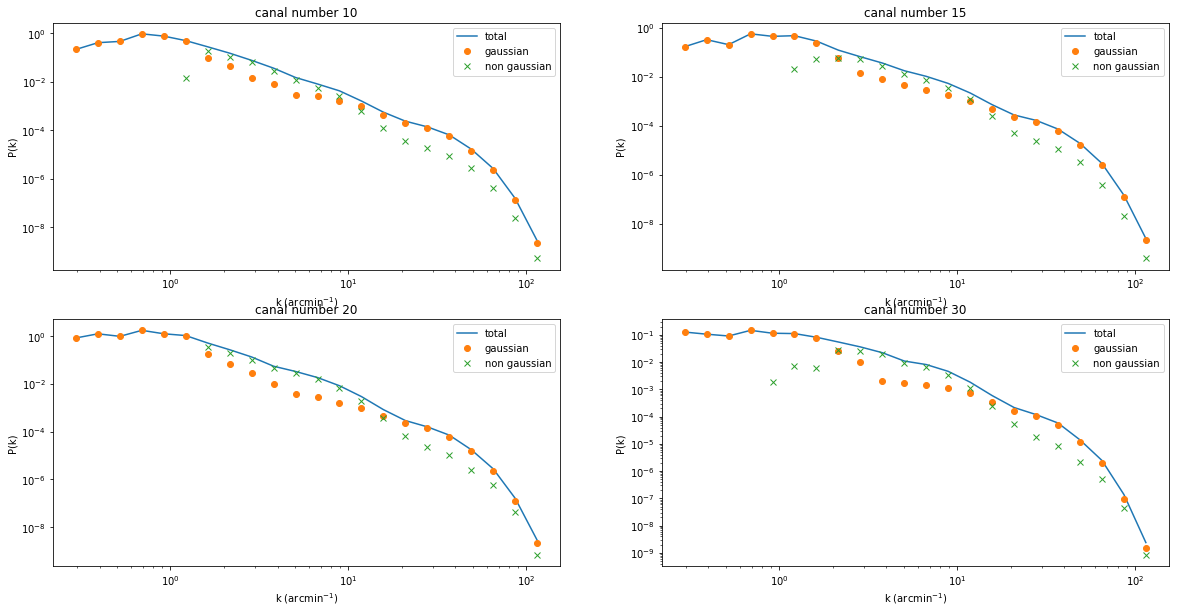

In [77]:
figure(figsize=(20,10))

subplot(2,2,1)
affiche(10)

subplot(2,2,2)
affiche(15)

subplot(2,2,3)
affiche(20)

subplot(2,2,4)
affiche(30)